<hr>

# Welcome to Week 7
<hr>

**Support Vector Machines (SVM)** is a type of supervised machine learning algorithm that can be used for classification or regression tasks. SVM can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. [More details](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)<br>
Types of kernel:
- Linear Kernel: $k(X_i,X_j)=(X_i^T,X_j)$, mapping $\phi(X)=x$
- Polynomial Kernel with degree $p:k(X_i,X_j)=(1+X_i^TX_j)^p$ 
- Radial basis function (RBF) kernel:$k(X_i,X_j)=e^-{\frac{||X_i-X_j||^2}{2\sigma ^2}}$ Mapping $\phi(X)$ is infinite dimensional.
<hr>

<img src="/figure/Kernel trick and non-linear SVM image 4.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />
     
 <br>

### iris datasets

In [1]:
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
iris = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris.data
y = iris.target

# Place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the first 5 rows of the data
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### feature relationship

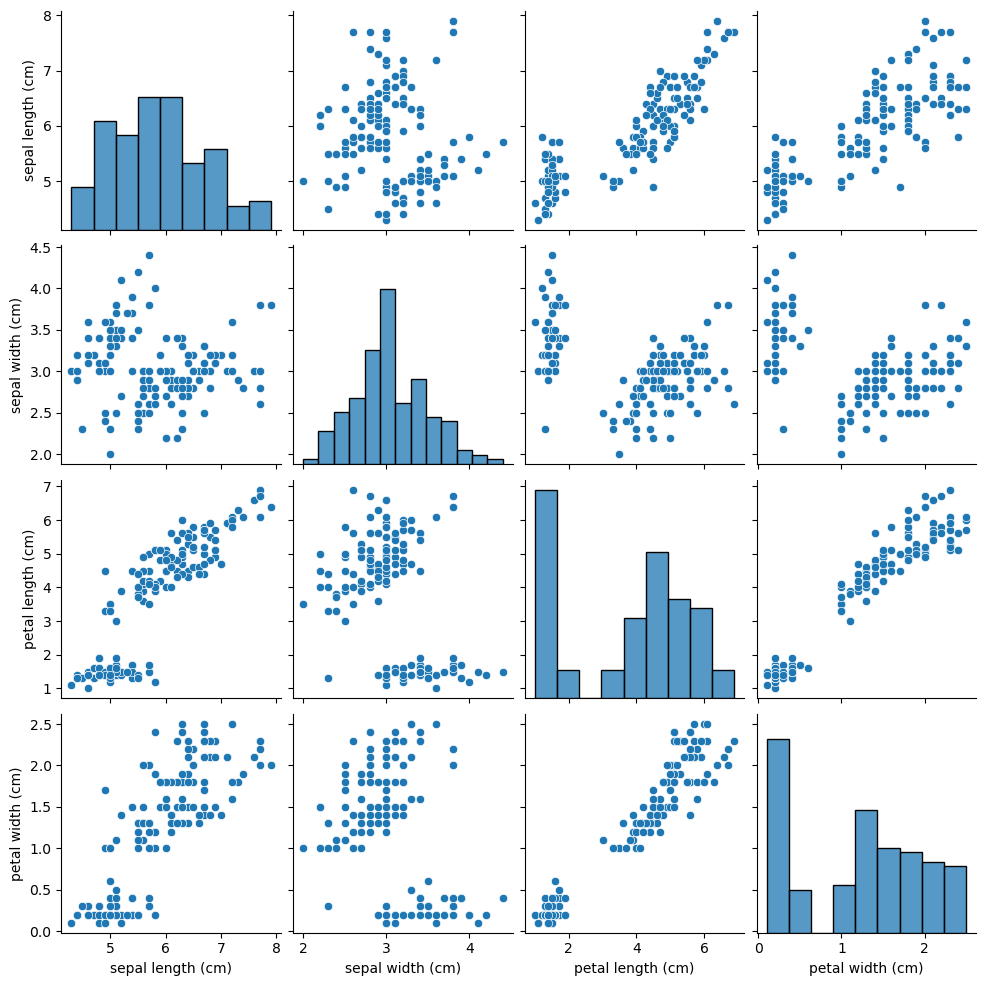

In [2]:
import seaborn as sns
sns.pairplot(iris_df)

### checking class balance

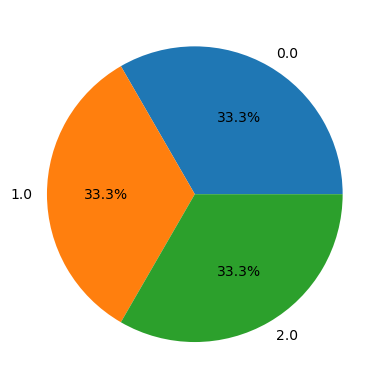

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
counts = Counter(y)
plt.pie([float(v) for v in counts.values()], labels=[float(k) for k in counts],
           autopct='%1.1f%%')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


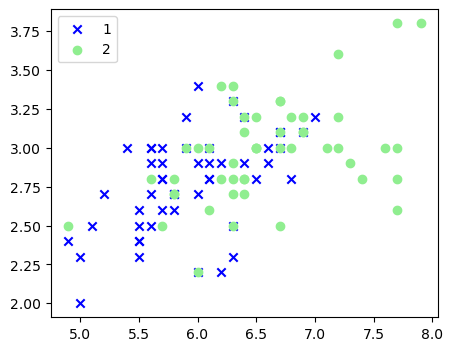

In [28]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
# markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
# colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y))])
# plt.figure(figsize=(5,4))
# for idx, cl in enumerate(np.unique(y)):
#     plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
#                c=cmap(idx), marker=markers[idx], label=cl)
# plt.legend()
# plt.savefig("original_data_green_all.png")
# plt.show()

plt.figure(figsize=(5,4))
for idx, cl in enumerate([1,2]):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(cl), marker=markers[cl], label=cl)
plt.legend()
plt.savefig("original_data_blue_green.png")
plt.show()

### Train and test data spliting

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 120 samples in the training set and 30 samples in the test set



### data scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After z-scorescaling on features:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After z-scorescaling on features:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.613030          0.108501           0.947518          0.736072
1          -0.567766         -0.124001           0.384914          0.347530
2          -0.803926          1.038510          -1.302896         -1.336154
3           0.258791         -0.124001           0.609956          0.736072
4           0.613030         -0.589006           1.003778          1.254129


### feature distribution with mean,$\mu= 0$

<Figure size 640x480 with 0 Axes>

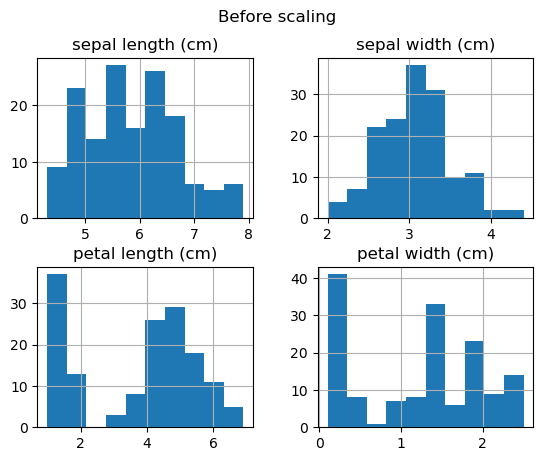

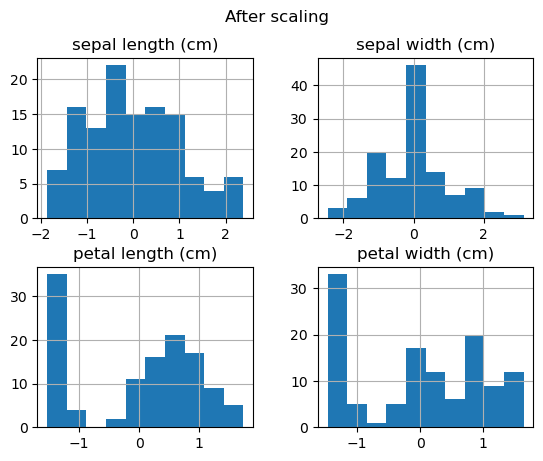

In [7]:
import seaborn as sns
plt.figure()
iris_df.hist()
plt.suptitle("Before scaling")
pd.DataFrame(X_train_std, columns=iris_df.columns).hist()
plt.suptitle("After scaling")
plt.show()

### train and test model

In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.96 out of 1
The accuracy of the svm classifier on test data is 1.00 out of 1


### PCA to reduce the diment into 2

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced_data_train=pca.fit_transform(X_train_std)
reduced_data_test=pca.transform(X_test_std)
classifier=SVC(kernel='linear', random_state=0, gamma=.10, C=1.0).fit(reduced_data_train,y_train)

In [10]:
y_test.shape

(30,)

### visulizing SVM boundaries

In [11]:
print(__doc__)
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def bnd(X, y, classifier,scor,test_idx=None, resolution=0.02):
  
    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter

    rbf_svc = classifier#svm.SVC(kernel=kernel_name, gamma=0.7, C=C).fit(X, y)


    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    # plt.subplot(1, 1, 1)
    # plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig=plt.figure(2)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
   
    # Plot also the training points
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    plt.title('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(scor))
    plt.xlabel('PCA-1')
    plt.ylabel('PCA-2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    fig.clear()

Automatically created module for IPython interactive environment


In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display
import ipywidgets as widgets
def f(c_val,gamma_val,kernel_name,Degree):
    svm = SVC(kernel=kernel_name, random_state=0, gamma=gamma_val,degree=Degree, C=c_val)
    svm.fit(reduced_data_train, y_train)
    print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(reduced_data_test, y_test)))
    bnd(reduced_data_test, y_test, svm,svm.score(reduced_data_test, y_test))
interact(f, c_val=(0.1,1,0.1), gamma_val=(0.1,1,0.1),kernel_name=['linear','rbf','poly'],Degree=(1,10,1));


interactive(children=(FloatSlider(value=0.5, description='c_val', max=1.0, min=0.1), FloatSlider(value=0.5, de…

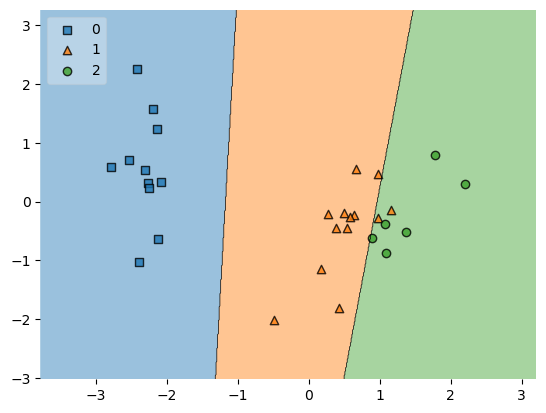

In [13]:
# Plot decision boundary
plot_decision_regions(reduced_data_test, y_test, clf=classifier, legend=2)
plt.show()

<hr> 

# Task
1. Load "digits" datasets from SKlearn and do the t-SNE for n=3
2. Visualizing the After and before t-SNE for the first two features.
3. Do the SVM with rbf kernel and report classification score

<hr> 